# Default Mode Network features

This notebook considers the behavior of the calculated features for nodes in the default mode network (DMN). The DMN is a core feature of resting state fMRI and abnormalities in DMN have been linked to depression and anxiety (as well as a lot of other things).

## File Notes

Opted to focus on the full set of features and use data driven dimensionality reduction (PCA) due to time constraints for the initial exploration in the EMBC paper. Using the default mode network (i.e. hypothesis driven dimensionality reduction) would be a valuable next step to fully understand the predictive power of these features. 



In [4]:
import sys
sys.path.append('..') #workaround to deal with directory issues in notebooks

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from scipy.io import loadmat


from src.features import load_features

In [5]:
# import variables
data_dir='../data/'
class_labels,two_class_labels,pos_str,neg_str,clus_co,ar_array,num_regions,num_subjs=load_features(data_dir)

In [6]:
#load network labels
network_labels_dict=loadmat('../data/external/cortex_parcel_network_assignments.mat')
print(network_labels_dict.keys())

dict_keys(['__header__', '__version__', '__globals__', 'netassignments'])


In [7]:
net_labels=network_labels_dict['netassignments'].flatten()
num_in_dmn=np.bincount(net_labels)[9] #network_labelfile.txt has how the network number corresponds to the network name. For DMN we are looking for Net_labels==9

print(f'Number of Nodes in DMN is {num_in_dmn}') 

Number of Nodes in DMN is 77


In [8]:
#select autocorrelation from DMN
dmn_features=np.zeros((num_in_dmn,num_subjs))
dmn_features=ar_array[net_labels.flatten()==9,:].transpose()
dmn_features.shape


(200, 77)

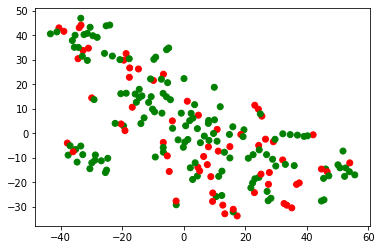

In [9]:

dmn_embedded=TSNE(n_components=2,perplexity=5).fit_transform(dmn_features) #tried various perplexities (5,10,15,30,50,100) at perplexities higher than 5 the points seem linearly correlated with no class distinctions and at high perplexities (100) the points seem randomly distributed. 
colormap = np.array(['r', 'g','b'])

plt.scatter(dmn_embedded[:,0],dmn_embedded[:,1],c=colormap[two_class_labels])
plt.show()